In [49]:
import numpy as np
import numba
from numba import jit

In [50]:
def local_intersection(Xs_local, Ys_local, xc_e, yc_e, ax1, ax2, angle, xv, yv, nv2):

    nx_cell = Xs_local.shape[0]
    ny_cell = Xs_local.shape[1]

    c = np.cos(angle*np.pi/180)
    s = np.sin(angle*np.pi/180)

    c1 = c/ax1
    s1 = s/ax1

    c2 = c/ax2
    s2 = s/ax2

    xv = xv-xc_e
    yv = yv-yc_e

    Xs_local_1d = Xs_local.ravel()
    Ys_local_1d = Ys_local.ravel()

    c1xv_p_s1yv = c1*xv + s1*yv
    c2yv_m_s2yv = c2*yv - s2*xv

    term1 = (c1**2 + s2**2) * Xs_local_1d**2
    term2 = (2*c1*s1 - 2*c2*s2) * Xs_local_1d * Ys_local_1d
    term3 = np.tensordot(Xs_local_1d, 2*c1*c1xv_p_s1yv - 2*s2*c2yv_m_s2yv, 0)
    term4 = (c2**2 + s1**2) * Ys_local_1d**2
    term5 = np.tensordot(Ys_local_1d, 2*c2*c2yv_m_s2yv + 2*s1*c1xv_p_s1yv, 0)
    term6 = c1xv_p_s1yv**2 + c2yv_m_s2yv**2

    term124 = term1+term2+term4
    term356 = term3+term5+term6

    term_tot = term124+term356.transpose()

    inside = (term_tot <= 1)

    area_fract_1d = np.sum(inside.astype(float), axis=0)

    # area_fract_1d = area_fract_1d / nv2
    area_fract_1d /= nv2

    area_fract = area_fract_1d.reshape(nx_cell, ny_cell)

    return (area_fract)

In [51]:
@jit(nopython=True)
def ellipse( xc , yc , ax1 , ax2 , angle , X_circle , Y_circle ):

    cos_angle = np.cos(angle*np.pi/180)
    sin_angle = np.sin(angle*np.pi/180)

    # x1 = xc + ax1 * cos_angle
    # y1 = yc + ax1 * sin_angle

    # x2 = xc - ax2 * sin_angle
    # y2 = yc + ax2 * cos_angle

    X = ax1 * X_circle
    Y = ax2 * Y_circle

    xe = xc + X*cos_angle - Y*sin_angle
    ye = yc + X*sin_angle + Y*cos_angle

    return (xe,ye)

In [52]:
# YOU DO NOT NEED TO RUN THIS

xc = 288830.0
yc = 2150362.0
ax1 = 26.081118798477803
ax2 = 24.409220221209875
angle = 39.8274074028988
x_circle = np.full((30), 4.0)
y_circle = np.full((30), 3.0)
# x_circle = [ 1.0, 0.97662056,  0.90757542,  0.79609307,  0.64738628,  0.46840844,
#   0.26752834, 0.05413891, -0.161782,   -0.37013816, -0.56118707, -0.72599549,
#  -0.85685718, -0.94765317, -0.99413796, -0.99413796, -0.94765317, -0.85685718,
#  -0.72599549, -0.56118707, -0.37013816, -0.161782,    0.05413891,  0.26752834,
#   0.46840844,  0.64738628, 0.79609307,  0.90757542,  0.97662056,  1.0 ]
# y_circle = [ 0.0,  2.14970440e-01,  4.19889102e-01,  6.05174215e-01,
#   7.62162055e-01,  8.83512044e-01,  9.63549993e-01,  9.98533414e-01,
#   9.86826523e-01,  9.28976720e-01,  8.27688998e-01,  6.87699459e-01,
#   5.15553857e-01,  3.19301530e-01,  1.08119018e-01, -1.08119018e-01,
#  -3.19301530e-01, -5.15553857e-01, -6.87699459e-01, -8.27688998e-01,
#  -9.28976720e-01, -9.86826523e-01, -9.98533414e-01, -9.63549993e-01,
#  -8.83512044e-01, -7.62162055e-01, -6.05174215e-01, -4.19889102e-01,
#  -2.14970440e-01, -2.44929360e-16]

print(len(x_circle))
print(len(y_circle))

30
30


In [53]:
# YOU DO NOT NEED TO RUN THIS
ellipse(xc, yc, ax1, ax2, angle, x_circle, y_circle)

(array([288863.21818024, 288863.21818024, 288863.21818024, 288863.21818024,
        288863.21818024, 288863.21818024, 288863.21818024, 288863.21818024,
        288863.21818024, 288863.21818024, 288863.21818024, 288863.21818024,
        288863.21818024, 288863.21818024, 288863.21818024, 288863.21818024,
        288863.21818024, 288863.21818024, 288863.21818024, 288863.21818024,
        288863.21818024, 288863.21818024, 288863.21818024, 288863.21818024,
        288863.21818024, 288863.21818024, 288863.21818024, 288863.21818024,
        288863.21818024, 288863.21818024]),
 array([2150485.0546176, 2150485.0546176, 2150485.0546176, 2150485.0546176,
        2150485.0546176, 2150485.0546176, 2150485.0546176, 2150485.0546176,
        2150485.0546176, 2150485.0546176, 2150485.0546176, 2150485.0546176,
        2150485.0546176, 2150485.0546176, 2150485.0546176, 2150485.0546176,
        2150485.0546176, 2150485.0546176, 2150485.0546176, 2150485.0546176,
        2150485.0546176, 2150485.0546176, 21

In [54]:
# YOU DO NOT NEED TO RUN THIS
%timeit ellipse(xc, yc, ax1, ax2, angle, x_circle, y_circle)

2.17 µs ± 25.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [55]:
# YOU DO NOT NEED TO RUN THIS
%timeit ellipse.py_func(xc, yc, ax1, ax2, angle, x_circle, y_circle)

10.5 µs ± 75.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [56]:
# read the run parameters form the file input_data.py
@jit(nopython=True)
def load_settings(n_vents,x_vent,y_vent):
    cum_fiss_length = np.zeros(n_vents)

    for j in range(1,n_vents):

        delta_xvent =  x_vent[j] - x_vent[j-1]
        delta_yvent =  y_vent[j] - y_vent[j-1]

        cum_fiss_length[j] = cum_fiss_length[j-1] + np.sqrt( delta_xvent**2 + delta_yvent**2 )

    if ( n_vents >1 ):
        cum_fiss_length = cum_fiss_length / cum_fiss_length[j]

    return cum_fiss_length


   

In [57]:
from input_data_advanced import *
from input_data import *

In [58]:
# filling_parameter, n_vents, cum_fiss_length = load_settings()


filling_parameter = 1 - thickening_parameter
n_vents = len(x_vent)

cum_fiss_length = load_settings(n_vents,np.ndarray(x_vent),np.ndarray(y_vent))

# print("Timing settings loading with numba")
# %timeit load_settings(n_vents,np.ndarray(x_vent),np.ndarray(y_vent))

# print("Timing settings loading withOUT numba")
# %timeit load_settings.py_func(n_vents,np.ndarray(x_vent),np.ndarray(y_vent))

In [59]:

def inellipse(xs, ys, xc_e, yc_e, ax1, ax2, c, s):

    x = xs-xc_e
    y = ys-yc_e

    inside = ((((x*c+y*s)/ax1)**2 + ((x*s-y*c)/ax2)**2) <= 1)

    return (inside)

In [60]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from linecache import getline
from matplotlib.patches import Ellipse
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import shapefile
import time
import os
import numpy.ma as ma
import sys
import shutil
import datetime
import rtnorm

In [82]:

for j in range(1, n_vents):

    delta_xvent = x_vent[j] - x_vent[j-1]
    delta_yvent = y_vent[j] - y_vent[j-1]

    cum_fiss_length[j] = cum_fiss_length[j-1] + \
        np.sqrt(delta_xvent**2 + delta_yvent**2)

if (n_vents > 1):
    cum_fiss_length = cum_fiss_length / cum_fiss_length[j]

# Search if another run with the same base name already exists
i = 0
count_inside = 0
condition = True

base_name = run_name

while condition:

    run_name = base_name + '_{0:03}'.format(i)

    backup_advanced_file = run_name + '_advanced_inp.bak'
    backup_file = run_name + '_inp.bak'

    condition = os.path.isfile(backup_file)

    i = i + 1

# Create a backup file of the input parameters
shutil.copy2('input_data_advanced.py', backup_advanced_file)
shutil.copy2('input_data.py', backup_file)

print('Run name', run_name)
print('')

if (plot_flow_flag) or (plot_lobes_flag):
    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(111)


if (len(shape_name) > 0):

    # Read the shapefile
    sf = shapefile.Reader(shape_name)
    recs = sf.records()
    shapes = sf.shapes()
    Nshp = len(shapes)

    cm = plt.get_cmap('Dark2')
    cccol = cm(1.*np.arange(Nshp)/Nshp)
    loop_diff = time.process_time()
    for nshp in xrange(Nshp):

        ptchs = [0]*len(prt)-1
        pts = np.array(shapes[nshp].points)
        prt = shapes[nshp].parts
        par = list(prt) + [pts.shape[0]]

        for pij in xrange(len(prt)):
            ptchs[pij] = Polygon(pts[par[pij]:par[pij+1]])
            # ptchs.append(Polygon(pts[par[pij]:par[pij+1]]))

        ax.add_collection(PatchCollection(
            ptchs, facecolor=cccol[nshp, :], edgecolor='k', linewidths=.1))
    print("TIME TAKEN WITH LIST CREATED: ", loop_diff)

print('')

if (a_beta == 0) and (b_beta == 0):

    alloc_n_lobes = int(max_n_lobes)

else:

    x_beta = np.rint(range(0, n_flows)) / (n_flows - 1)

    beta_pdf = beta.pdf(x_beta, a_beta, b_beta)

    alloc_n_lobes = np.int(np.rint(min_n_lobes + 0.5 * (max_n_lobes - min_n_lobes)
                                   * np.max(beta_pdf)))

    print('Flow with the maximum number of lobes', np.argmax(beta_pdf))

print('Maximum number of lobes', alloc_n_lobes)


# Initialize the arrays for the lobes variables
angle = np.zeros(alloc_n_lobes)
x = np.zeros(alloc_n_lobes)
y = np.zeros(alloc_n_lobes)
x1 = np.zeros(alloc_n_lobes)
x2 = np.zeros(alloc_n_lobes)
h = np.zeros(alloc_n_lobes)

dist_int = np.zeros(alloc_n_lobes, dtype=np.int)-1
descendents = np.zeros(alloc_n_lobes, dtype=np.int)
parent = np.zeros(alloc_n_lobes, dtype=np.int)
alfa_inertial = np.zeros(alloc_n_lobes)

if (volume_flag == 1):

    if (fixed_dimension_flag == 1):

        avg_lobe_thickness = total_volume / \
            (n_flows * lobe_area * 0.5 * (min_n_lobes + max_n_lobes))
        sys.stdout.write("Average Lobe thickness = %f m\n\n" %
                         (avg_lobe_thickness))

    elif (fixed_dimension_flag == 2):

        lobe_area = total_volume / \
            (n_flows * avg_lobe_thickness * 0.5 * (min_n_lobes + max_n_lobes))
        sys.stdout.write("Lobe area = %f m2\n\n" % (lobe_area))


# Needed for numpy conversions
pi = 3.141592653589793
deg2rad = pi / 180.0
rad2deg = 180.0 / pi


# Define variables needed to build the ellipses
t = np.linspace(0, 2*np.pi, npoints)
X_circle = np.cos(t)
Y_circle = np.sin(t)

Run name HAWAII_005_000_000_000_000_000_000_000_000



NameError: name 'loop_diff' is not defined

In [62]:
# Parse the header using a loop and
# the built-in linecache module
hdr = [getline(source, i) for i in range(1,7)]
values = [float(h.split(" ")[-1].strip()) \
 for h in hdr]

270133.2 2123588.0
Restart file time 
LINE 281: The time of retsart file time  48.978192
LINE 321 test start 
LINE 357 n test time  53.304315
LINE 367 max slope units 
Line 401  53.304725
max_semiaxis 39.89422804014327
End pre-processing



/var/folders/ms/68z9q15176d8td8g27mfznw00000gn/T/ipykernel_35038/381291873.py:169: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  jtop_array = np.zeros(alloc_n_lobes, dtype=np.int)
/var/folders/ms/68z9q15176d8td8g27mfznw00000gn/T/ipykernel_35038/381291873.py:170: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to 

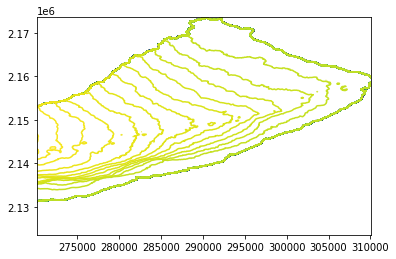

In [63]:
cols, rows, lx, ly, cell, nd = values

# Load the dem into a numpy array
arr = np.loadtxt(source, skiprows=6)

nx = arr.shape[1]
xs = lx + cell*(np.arange(0, nx))
xmin = np.min(xs)
xmax = np.max(xs)


ny = arr.shape[0]
ys = ly + cell*(np.arange(0, ny))
ymin = np.min(ys)
ymax = np.max(ys)

print(xmin, ymin)


Xs, Ys = np.meshgrid(xs, ys)

Zs = np.flipud(arr)

print("Restart file time ")
i_res_time = time.process_time()
for i_restart in range(0, len(restart_files)):

    Zflow_old = np.zeros((ny, nx))

    source = restart_files[i_restart]

    # Load the previous flow thickness into a numpy array
    arr = np.loadtxt(source, skiprows=6)

    Zflow_old = np.flipud(arr)

    Zs = Zs + Zflow_old
print('LINE 281: The time of retsart file time ', i_res_time)

# Define a small grid for lobe-cells intersection
nv = 20
xv, yv = np.meshgrid(np.linspace(-0.5*cell, 0.5*cell, nv),
                     np.linspace(-0.5*cell, 0.5*cell, nv))
xv = np.reshape(xv, -1)
yv = np.reshape(yv, -1)
nv2 = nv*nv

# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label

if (plot_lobes_flag) or (plot_flow_flag):

    plt.contour(Xs, Ys, Zs, 150)

    plt.savefig('fig_map.png')


Ztot = np.zeros((ny, nx))
Ztot_temp = np.zeros((ny, nx))

np.copyto(Ztot, Zs)
np.copyto(Ztot_temp, Zs)
#Ztot[:] = Zs[:]
#Ztot_temp[:] = Zs[:]

# Generate n_test random points on the domain to check if the slope is
# evaluated correctly

n_test = 0
print("LINE 321 test start ")
n_test_time = time.process_time()
for j in range(0, n_test):

    x_test = xmin + np.random.uniform(0, 1, size=1)*(xmax-xmin)
    y_test = ymin + np.random.uniform(0, 1, size=1)*(ymax-ymin)

    xi = (x_test - xmin)/cell
    yi = (y_test - ymin)/cell

    # Index of the lower-left corner of the cell containing the point
    ix = np.floor(xi)
    iy = np.floor(yi)

    ix = ix.astype(int)
    iy = iy.astype(int)

    # Relative coordinates of the point in the cell
    xi_fract = xi-ix
    yi_fract = yi-iy

    Fxi = (yi_fract*(Zs[iy+1, ix+1] - Zs[iy+1, ix]) +
           (1.0-yi_fract)*(Zs[iy, ix+1] - Zs[iy, ix])) / cell
    Fyi = (xi_fract*(Zs[iy+1, ix+1] - Zs[iy, ix+1]) +
           (1.0-xi_fract)*(Zs[iy+1, ix] - Zs[iy, ix])) / cell

    angle_test = np.mod(180 + (180 * np.arctan2(Fy_test, Fx_test) / pi), 360)
    slope_test = np.sqrt(np.square(Fx_test)+np.square(Fy_test))

    xt = x_test + 1000 * slope_test * np.cos(angle_test * np.pi/180)
    xt = y_test + 1000 * slope_test * np.sin(angle_test * np.pi/180)

    if (plot_lobes_flag) or (plot_flow_flag):

        plt.plot(x_test, y_test, 'o')
        plt.plot([x_test, xt], [y_test, yt])
print("LINE 357 n test time ", n_test_time)
# Compute the path of maximum slope form the vent

xold = x_vent[0]
yold = y_vent[0]

max_slope_units = 0
max_slope_units_time = time.process_time()
print("LINE 367 max slope units ")
for i in range(0, max_slope_units):

    x_max_slope = xold
    y_max_slope = yold

    xi = (xold - xmin)/cell
    yi = (yold - ymin)/cell

    ix = np.floor(xi)
    iy = np.floor(yi)

    ix = ix.astype(int)
    iy = iy.astype(int)

    xi_fract = xi-ix
    yi_fract = yi-iy

    Fx_test = (yi_fract*(Ztot[iy+1, ix+1] - Ztot[iy+1, ix]) +
               (1.0-yi_fract)*(Ztot[iy, ix+1] - Ztot[iy, ix])) / cell
    Fy_test = (xi_fract*(Ztot[iy+1, ix+1] - Ztot[iy, ix+1]) +
               (1.0-xi_fract)*(Ztot[iy+1, ix] - Ztot[iy, ix])) / cell

    angle_test = np.mod(180 + (180 * np.arctan2(Fy_test, Fx_test) / pi), 360)
    slope_test = np.sqrt(np.square(Fx_test)+np.square(Fy_test))

    xold = x_max_slope + 50 * slope_test * np.cos(angle_test * np.pi/180)
    yold = y_max_slope + 50 * slope_test * np.sin(angle_test * np.pi/180)

    if (xold < xmin) or (xold > xmax) or (yold < ymin) or (yold > ymax):

        break

    if (plot_lobes_flag) or (plot_flow_flag):
        plt.plot([xold, x_max_slope], [yold, y_max_slope], 'b-')
        
print("Line 401 ", max_slope_units_time)

Xs_1d = np.reshape(Xs, -1)
Ys_1d = np.reshape(Ys, -1)

nxy = Xs_1d.shape[0]

points = np.zeros((nxy, 2))

Zflow = np.zeros((ny, nx))

max_semiaxis = np.sqrt(lobe_area * max_aspect_ratio / np.pi)
max_cells = np.ceil(2.0 * max_semiaxis / cell) + 4
max_cells = max_cells.astype(int)

print('max_semiaxis', max_semiaxis)

jtop_array = np.zeros(alloc_n_lobes, dtype=np.int)
jbottom_array = np.zeros(alloc_n_lobes, dtype=np.int)

iright_array = np.zeros(alloc_n_lobes, dtype=np.int)
ileft_array = np.zeros(alloc_n_lobes, dtype=np.int)


Zhazard = np.zeros((ny, nx))
Zhazard_temp = np.zeros((ny, nx))

Zdist = Zflow + 9999

if (saveshape_flag):

    # create the Polygon shapefile
    w = shapefile.Writer(shapefile.POLYGON)
    w.autoBalance = 1
    # the field
    w.field('ID', 'N', '40')
    w.field('DIST_INT', 'N', '40')
    w.field('DESCENDENTS', 'N', '40')
    w.field('PARENT', 'N', '40')
    w.field('FLOW', 'N', '40')


patch = [0]*(n_flows*n_init + n_flows*(n_lobes-n_init))


print('End pre-processing')
print('')

# counter for the re-evaluation of the slope
flows_counter = 0

start = time.process_time()

est_rem_time = ''

n_lobes_tot = 0

In [64]:
def get_idx(dist_int):
    idx0 = np.random.uniform(0, 1, size=1)

    idx1 = idx0 ** lobe_exponent

    if (force_max_length):

        # the parent lobe is chosen only among those with
        # dist smaller than the maximum value fixed in input
        mask = dist_int[0:i] < max_length

        idx2 = sum(mask[0:i]) * idx1

        idx3 = np.floor(idx2)

        idx = np.int(idx3)

        sorted_dist = np.argsort(dist_int[0:i])

        idx = sorted_dist[idx]

    else:

        # the parent lobe is chosen among all the lobes

        idx2 = i * idx1

        idx3 = np.floor(idx2)

        idx = np.int(idx3)

    if (start_from_dist_flag):

        # the probability law is associated to the distance
        # from the vent
        sorted_dist = np.argsort(dist_int[0:i])

        idx = sorted_dist[idx]

    
    return idx

In [65]:
@jit(nopython=True)
def get_n_lobes(flow):
    if (a_beta == 0) and (b_beta == 0):

        # DEFINE THE NUMBER OF LOBES OF THE FLOW (RANDOM VALUE BETWEEN MIN AND MAX)
        n_lobes = np.ceil(np.random.uniform(
            min_n_lobes, max_n_lobes, size=1))

    else:

        x_beta = (1.0 * flow) / (n_flows - 1)

        n_lobes = np.rint(min_n_lobes + 0.5 * (max_n_lobes - min_n_lobes)
                                 * beta.pdf(x_beta, a_beta, b_beta))

    return n_lobes

In [ ]:
# YOU DO NOT NEED TO RUN THIS
%timeit get_n_lobes(1)
# YOU DO NOT NEED TO RUN THIS
%timeit get_n_lobes.py_func(1)

In [72]:
plot_flow_flag = 0
plot_lobes_flag = 0
# counter for the re-evaluation of the slope
flows_counter = 0

start = time.process_time()

est_rem_time = ''

n_lobes_tot = 0

# Loop over the number of flows defined in the input file input_data.py
n_flow_time = time.process_time()
print("LINE 460 n flows  ", n_flow_time)
for flow in range(0, n_flows): #1024 times loop

    # Small array of integers (0 or 1 ) around the lobe defining the cells touched by the lobe
    Zflow_local_array = np.zeros(
        (alloc_n_lobes, max_cells, max_cells), dtype=np.int)

    # Number of descendants in the tree structure of the flow
    descendents = np.zeros(alloc_n_lobes, dtype=np.int)

    i_first_check = n_check_loop

    # Counter for the re-evaluation of the slope
    flows_counter = flows_counter + 1

    if (a_beta == 0) and (b_beta == 0):

        # DEFINE THE NUMBER OF LOBES OF THE FLOW (RANDOM VALUE BETWEEN MIN AND MAX)
        n_lobes = np.int(np.ceil(np.random.uniform(
            min_n_lobes, max_n_lobes, size=1)))

    else:

        x_beta = (1.0 * flow) / (n_flows - 1)

        n_lobes = np.int(np.rint(min_n_lobes + 0.5 * (max_n_lobes - min_n_lobes)
                                 * beta.pdf(x_beta, a_beta, b_beta)))

    n_lobes_tot = n_lobes_tot + n_lobes

    thickness_min = 2.0 * thickness_ratio / \
        (thickness_ratio + 1.0) * avg_lobe_thickness
    delta_lobe_thickness = 2.0 * \
        (avg_lobe_thickness - thickness_min) / (n_lobes - 1.0)

    if (n_flows > 1):
        # Print on screen bar with percentage of flows computed
        last_percentage_5 = np.rint(flow*20.0/(n_flows)).astype(int)
        last_percentage = np.rint(flow*100.0/(n_flows))
        last_percentage = np.rint(flow*100.0/(n_flows))
        last_percentage = last_percentage.astype(int)
        sys.stdout.write('\r')
        sys.stdout.write("[%-20s] %d%% %s" %
                         ('='*(last_percentage_5), last_percentage, est_rem_time))
        sys.stdout.flush()

    # Modify the slope
    if (topo_mod_flag >= 1) and (flows_counter == n_flows_counter):

        flows_counter = 0

        np.copyto(Ztot, Ztot_temp)

    lobes_counter = 0

    for i in range(0, n_init):  # 1 initial 

        if (n_flows == 1):
            # Print on screen bar with percentage of flows computed
            last_percentage = np.rint(i*20.0/(n_lobes-1))*5
            last_percentage = last_percentage.astype(int)

            sys.stdout.write('\r')
            sys.stdout.write("[%-20s] %d%%" %
                             ('='*(last_percentage/5), last_percentage))
            sys.stdout.flush()

        # STEP 0: COMPUTE THE FIRST LOBES OF EACH FLOW

        if (n_vents == 1):

            x[i] = x_vent[0]
            y[i] = y_vent[0]

        else:

            if (vent_flag == 0):

                i_vent = np.int(np.floor(flow * n_vents / n_flows))

                x[i] = x_vent[i_vent]
                y[i] = y_vent[i_vent]

            elif (vent_flag == 1):

                i_vent = np.random.randint(n_vents, size=1)

                x[i] = x_vent[i_vent]
                y[i] = y_vent[i_vent]

            elif (vent_flag == 2):

                alfa_polyline = np.random.uniform(0, 1, size=1)

                idx_vent = np.argmax(cum_fiss_length > alfa_polyline)

                num = alfa_polyline - cum_fiss_length[idx_vent-1]
                den = cum_fiss_length[idx_vent] - cum_fiss_length[idx_vent-1]

                alfa_segment = num / den

                x[i] = alfa_segment * x_vent[idx_vent] + \
                    (1.0 - alfa_segment) * x_vent[idx_vent-1]
                y[i] = alfa_segment * y_vent[idx_vent] + \
                    (1.0 - alfa_segment) * y_vent[idx_vent-1]

            elif (vent_flag == 3):

                i_segment = np.random.randint(n_vents-1, size=1)

                alfa_segment = np.random.uniform(0, 1, size=1)

                x[i] = alfa_segment * x_vent[i_segment] + \
                    (1.0 - alfa_segment) * x_vent[i_segment-1]
                y[i] = alfa_segment * y_vent[i_segment] + \
                    (1.0 - alfa_segment) * y_vent[i_segment-1]

        # Initialize distance from first lobe and number of descendents
        dist_int[i] = 0
        descendents[i] = 0

        if (plot_lobes_flag) or (plot_flow_flag):

            # plot the center of the first lobe
            plt.plot(x[i], y[i], 'o')

        # Compute the gradient of the topography(+ eventually the flow)

        xi = (x[i] - xmin)/cell
        yi = (y[i] - ymin)/cell

        # Index of the lower-left corner of the cell containing the point
        ix = np.floor(xi)
        iy = np.floor(yi)

        ix = ix.astype(int)
        iy = iy.astype(int)

        xi_fract = xi-ix
        yi_fract = yi-iy

        Fx_test = (yi_fract*(Ztot[iy+1, ix+1] - Ztot[iy+1, ix]) +
                   (1.0-yi_fract)*(Ztot[iy, ix+1] - Ztot[iy, ix])) / cell
        Fy_test = (xi_fract*(Ztot[iy+1, ix+1] - Ztot[iy, ix+1]) +
                   (1.0-xi_fract)*(Ztot[iy+1, ix] - Ztot[iy, ix])) / cell

        # major semi-axis direction
        max_slope_angle = np.mod(
            180 + (180 * np.arctan2(Fy_test, Fx_test) / pi), 360)

        # slope of the topography at (x[0],y[0])
        slope = np.sqrt(np.square(Fx_test)+np.square(Fy_test))

        # PERTURBE THE MAXIMUM SLOPE ANGLE ACCORDING TO PROBABILITY LAW

        # this expression define a coefficient used for the direction of the next slope
        if (max_slope_prob < 1):

            # angle defining the direction of the new slope. when slope=0, then
            # we have an uniform distribution for the possible angles for the next lobe.

            slopedeg = 180.0 * np.arctan(slope) / pi

            if (slopedeg > 0.0) and (max_slope_prob > 0):

                sigma = (1.0 - max_slope_prob) / max_slope_prob * \
                    (90.0 - slopedeg) / slopedeg
                rand_angle_new = rtnorm.rtnorm(-180, 180, 0, sigma)

            else:

                rand = np.random.uniform(0, 1, size=1)
                rand_angle_new = 360.0 * np.abs(rand-0.5)

            angle[i] = max_slope_angle + rand_angle_new

        else:

            angle[i] = max_slope_angle

        # factor for the lobe eccentricity
        aspect_ratio = min(max_aspect_ratio, 1.0 + aspect_ratio_coeff * slope)

        # semi-axes of the lobe:
        # x1(i) is the major semi-axis of the lobe;
        # x2(i) is the minor semi-axis of the lobe.
        x1[i] = np.sqrt(lobe_area/np.pi) * np.sqrt(aspect_ratio)
        x2[i] = np.sqrt(lobe_area/np.pi) / np.sqrt(aspect_ratio)

        if (plot_lobes_flag):

            patch[flow*n_flows + i] = Ellipse([x[i], y[i]], 2*x1[i], 2*x2[i],
                                 angle[i], facecolor='none', edgecolor='k')
            # patch.append(Ellipse([x[i], y[i]], 2*x1[i], 2*x2[i],
            #                      angle[i], facecolor='none', edgecolor='k'))

        if (saveraster_flag == 1) or (topo_mod_flag >= 1):

            # compute the points of the lobe
            [xe, ye] = ellipse(x[i], y[i], x1[i], x2[i],
                               angle[i], X_circle, Y_circle)

            min_xe = np.min(xe)
            max_xe = np.max(xe)

            min_ye = np.min(ye)
            max_ye = np.max(ye)

            xi = (min_xe - xmin)/cell
            ix = np.floor(xi)
            i_left = ix.astype(int)-1

            xi = (max_xe - xmin)/cell
            ix = np.floor(xi)
            i_right = ix.astype(int)+3

            yj = (min_ye - ymin)/cell
            jy = np.floor(yj)
            j_bottom = jy.astype(int)-1

            yj = (max_ye - ymin)/cell
            jy = np.floor(yj)
            j_top = jy.astype(int)+3

            Xs_local = Xs[j_bottom:j_top, i_left:i_right]
            Ys_local = Ys[j_bottom:j_top, i_left:i_right]

            area_fract = local_intersection(
                Xs_local, Ys_local, x[i], y[i], x1[i], x2[i], angle[i], xv, yv, nv2)

            Zflow_local = area_fract
            Zflow_local_int = np.ceil(area_fract)
            Zflow_local_int = Zflow_local_int.astype(int)

            lobe_thickness = thickness_min + (i-1) * delta_lobe_thickness

            Zflow[j_bottom:j_top, i_left:i_right] += lobe_thickness * Zflow_local

            Ztot_temp[j_bottom:j_top, i_left:i_right] = Zs[j_bottom:j_top, i_left:i_right] + \
                filling_parameter * Zflow[j_bottom:j_top, i_left:i_right]

            Zdist_local = Zflow_local_int * \
                dist_int[i] + 9999 * (Zflow_local == 0)

            Zdist[j_bottom:j_top, i_left:i_right] = np.minimum(
                Zdist[j_bottom:j_top, i_left:i_right], Zdist_local)

            jtop_array[i] = j_top
            jbottom_array[i] = j_bottom

            iright_array[i] = i_right
            ileft_array[i] = i_left

            if (hazard_flag):

                # store the local array
                Zflow_local_array[i, 0:j_top-j_bottom,
                                  0:i_right-i_left] = Zflow_local_int

            lobes_counter = lobes_counter + 1

        if (saveshape_flag):

            # compute the lobe
            [xe, ye] = ellipse(x[i], y[i], x1[i], x2[i],
                               angle[i], X_circle, Y_circle)

            shape_verts = np.zeros((npoints-1, 2))

            shape_verts[0:npoints-1, 0] = xe[0:npoints-1]
            shape_verts[0:npoints-1, 1] = ye[0:npoints-1]

            w.poly(parts=[shape_verts.tolist()])
            w.record(str(i+1), str(dist_int[i]),
                     str(descendents[i]), str(0), str(flow+1))
    # print("Line 733 ", n_flow_time)
    last_lobe = n_lobes
    n_lobes_time = time.process_time()
    # print("LINE 736 n lobes time  ")

    # Loop one
    # print("N init ", n_init, " n lobes ",  n_lobes)
    # So here it goes from 1 to 207
    for i in range(n_init, n_lobes):

        # print('i',i)

        if (n_flows == 1):
            # print on screen bar with percentage of flows computed
            last_percentage = np.rint(i*20.0/(n_lobes-1))*5
            sys.stdout.write('\r')
            sys.stdout.write("[%-20s] %d%%" %
                             ('='*(last_percentage/5), last_percentage))
            sys.stdout.flush()

        # STEP 0: DEFINE THE INDEX idx OF THE PARENT LOBE

        if (lobe_exponent > 0):

            idx0 = np.random.uniform(0, 1, size=1)

            idx1 = idx0 ** lobe_exponent

            if (force_max_length):

                # the parent lobe is chosen only among those with
                # dist smaller than the maximum value fixed in input
                mask = dist_int[0:i] < max_length

                idx2 = sum(mask[0:i]) * idx1

                idx3 = np.floor(idx2)

                idx = np.int(idx3)

                sorted_dist = np.argsort(dist_int[0:i])

                idx = sorted_dist[idx]

            else:

                # the parent lobe is chosen among all the lobes

                idx2 = i * idx1

                idx3 = np.floor(idx2)

                idx = np.int(idx3)

            if (start_from_dist_flag):

                # the probability law is associated to the distance
                # from the vent
                sorted_dist = np.argsort(dist_int[0:i])

                idx = sorted_dist[idx]

        else:

            idx = i-1

        # save the index of the parent and the distance from first lobe of the chain
        parent[i] = idx
        dist_int[i] = dist_int[idx] + 1

        # for all the "ancestors" increase by one the number of descendents

        last = i
        # Loop 2
        count_inside += 1
        # prcint("DSFdsf ", dist_int[idx])
        for j in range(0, dist_int[idx]+1):

            previous = parent[last]
            descendents[previous] = descendents[previous]+1
            last = previous

        # local slope of the topography. The slope affects both the location of
        # the new lobe on the boundary of the previous one and its aspect
        # ratio:
        # if slope = 0 the lobe is a circle (x1=x2);
        # if slope > 1 the lobe is an ellipse.

        # STEP 1: COMPUTE THE SLOPE AND THE MAXIMUM SLOPE ANGLE
        #         The direction az_i as described in the paper is found here

        # Search for the cell containing the center of the parent lobe
        xi = (x[idx] - xmin)/cell
        yi = (y[idx] - ymin)/cell

        # Indexes of the lower-left corner of the cell containing the center of the parent lobe
        ix = np.floor(xi)
        iy = np.floor(yi)

        # Convert to integer
        ix = ix.astype(int)
        iy = iy.astype(int)

        # Indexes of the top-right corner of the cell containing the center of the parent lobe
        ix1 = ix+1
        iy1 = iy+1

        # Stopping condition (lobe close the domain boundary)
        if (ix <= max_cells) or (ix1 >= nx-max_cells) or (iy <= max_cells) or (iy1 >= ny-max_cells):

            last_lobe = i-1
            break

        # Relative coordinates of the center of the parent lobe in the cell
        xi_fract = xi-ix
        yi_fract = yi-iy

        # Ztot at the parent lobe center (obained with a bilinear interpolation)
        zidx = xi_fract * (yi_fract * Ztot[iy1, ix1] + (1.0-yi_fract) * Ztot[iy, ix1]) \
            + (1.0-xi_fract) * (yi_fract *
                                Ztot[iy1, ix] + (1.0-yi_fract) * Ztot[iy, ix])

        # Compute n_points on the parent lobe boundary to search for the point with minimum Ztot
        [xe, ye] = ellipse(x[idx], y[idx], x1[idx], x2[idx],
                           angle[idx], X_circle, Y_circle)

        xei = (xe - xmin)/cell
        yei = (ye - ymin)/cell

        # Indexes of the lower-left corners of the cells containing the points on the lobe boundary
        ixe = np.floor(xei)
        iye = np.floor(yei)

        # Convert to integers
        ixe = ixe.astype(int)
        iye = iye.astype(int)

        # Indexes of the top-right corners of the cells containing the points on the lobe boundary
        ixe1 = ixe+1
        iye1 = iye+1

        # Relative coordinates of the n_points in the respective containing cells
        xei_fract = xei-ixe
        yei_fract = yei-iye

        # Ztot at the n_points on the parent lobe boundary (obained with a bilinear interpolation)
        ze = xei_fract * (yei_fract * Ztot[iye1, ixe1] + (1.0-yei_fract) * Ztot[iye, ixe1]) \
            + (1.0-xei_fract) * (yei_fract *
                                 Ztot[iye1, ixe] + (1.0-yei_fract) * Ztot[iye, ixe])

        # Index of the point with minimum Ztot
        idx_min = np.argmin(ze)

        # Components of the vector from the parent lobe center to the point of minimum
        dx_lobe = x[idx] - xe[idx_min]
        dy_lobe = y[idx] - ye[idx_min]
        dz_lobe = zidx - ze[idx_min]

        # Slope of the vector
        slope = np.maximum(
            0.0, dz_lobe / (np.sqrt(np.square(dx_lobe)+np.square(dy_lobe))))

        # Angle defining the direction of maximum slope
        max_slope_angle = np.mod(
            180 + (180 * np.arctan2(dy_lobe, dx_lobe) / pi), 360)

        # STEP 2: PERTURBE THE MAXIMUM SLOPE ANGLE ACCORDING TO PROBABILITY LAW
        #         the direction az_i' as described in the paper is found here

        # This expression define a coefficient used for the direction of the next slope
        if (max_slope_prob < 1):

            # Angle defining the direction of the new slope. when slope=0, then
            # we have an uniform distribution for the possible angles for the next lobe.

            slopedeg = 180.0 * np.arctan(slope) / pi

            if (slopedeg > 0.0) and (max_slope_prob > 0.0):

                sigma = (1.0 - max_slope_prob) / max_slope_prob * \
                    (90.0 - slopedeg) / slopedeg
                rand_angle_new = rtnorm.rtnorm(-180, 180, 0, sigma)

            else:

                rand = np.random.uniform(0, 1, size=1)
                rand_angle_new = 360.0 * np.abs(rand-0.5)

            new_angle = max_slope_angle + rand_angle_new[0]

        else:

            new_angle = max_slope_angle

        # STEP 3: ADD THE EFFECT OF INERTIA
        #         the direction az_i'' as described in the paper is found here

        # cos and sin of the angle of the parent lobe
        cos_angle1 = np.cos(angle[idx]*deg2rad)
        sin_angle1 = np.sin(angle[idx]*deg2rad)

        # cos and sin of the angle of maximum slope
        cos_angle2 = np.cos(new_angle*deg2rad)
        sin_angle2 = np.sin(new_angle*deg2rad)

        if (inertial_exponent == 0):

            alfa_inertial[i] = 0.0

        else:

            alfa_inertial[i] = (1.0 - (2.0 * np.arctan(slope) / np.pi)**inertial_exponent) \
                ** (1.0 / inertial_exponent)

        x_avg = (1.0 - alfa_inertial[i]) * \
            cos_angle2 + alfa_inertial[i] * cos_angle1
        y_avg = (1.0 - alfa_inertial[i]) * \
            sin_angle2 + alfa_inertial[i] * sin_angle1

        angle_avg = np.mod(180 * np.arctan2(y_avg, x_avg) / pi, 360)

        new_angle = angle_avg

        # STEP 4: DEFINE THE SEMI-AXIS OF THE NEW LOBE

        # a define the ang.coeff. of the line defining the location of the
        # center of the new lobe in a coordinate system defined by the
        # semi-axes of the existing lobe
        a = np.tan(deg2rad*(new_angle-angle[idx]))

        # xt is the 1st-coordinate of the point of the boundary of the ellipse
        # definind the direction of the new lobe, in a coordinate system
        # defined by the semi-axes of the existing lobe
        if (np.cos(deg2rad*(new_angle-angle[idx])) > 0):

            xt = np.sqrt(x1[idx]**2 * x2[idx]**2 /
                         (x2[idx]**2 + x1[idx]**2 * a**2))

        else:

            xt = - np.sqrt(x1[idx]**2 * x2[idx]**2 /
                           (x2[idx]**2 + x1[idx]**2 * a**2))

        # yt is the 2nd-coordinate of the point of the boundary of the ellipse
        # definind the direction of the new lobe, in a coordinate system
        # defined by the semi-axes of the existing lobe
        yt = a * xt

        # (delta_x,delta_y) is obtained rotating the vector (xt,yt) by the
        # angle defined by the major semi-axis of the existing lobe. In this
        # way we obtain the location in a coordinate-system centered in the
        # center of the existing lobe, but this time with the axes parallel to
        # the original x and y axes.

        delta_x = xt * cos_angle1 - yt * sin_angle1
        delta_y = xt * sin_angle1 + yt * cos_angle1

        # The slope coefficient is evaluated at the point of the boundary of the ellipse
        # definind by the direction of the new lobe

        xi = (x[idx]+delta_x - xmin)/cell
        yi = (y[idx]+delta_y - ymin)/cell

        ix = np.floor(xi)
        iy = np.floor(yi)

        ix = ix.astype(int)
        iy = iy.astype(int)

        ix1 = ix+1
        iy1 = iy+1

        # Stopping condition (lobe close the domain boundary)
        if (ix <= max_cells) or (ix1 >= nx-max_cells) or (iy <= max_cells) or (iy1 >= ny-max_cells):

            last_lobe = i-1
            break

        xi_fract = xi-ix
        yi_fract = yi-iy

        # ztot at the new budding point
        ze = xi_fract * (yi_fract * Ztot[iy1, ix1] + (1.0-yi_fract) * Ztot[iy, ix1]) \
            + (1.0-xi_fract) * (yi_fract *
                                Ztot[iy1, ix] + (1.0-yi_fract) * Ztot[iy, ix])

        slope = np.maximum(0.0, (zidx - ze) /
                           (np.sqrt(np.square(delta_x)+np.square(delta_y))))

        aspect_ratio = min(max_aspect_ratio, 1.0 + aspect_ratio_coeff * slope)

        # (new_x1,new_x2) are the semi-axes of the new lobe. slope_coeff is
        # used to have an elongated lobe accoriding to the slope of the
        # topography. It is possible to modifiy these values in order to have
        # the same volume for all the lobes.
        new_x1 = np.sqrt(lobe_area/np.pi)*np.sqrt(aspect_ratio)
        new_x2 = np.sqrt(lobe_area/np.pi)/np.sqrt(aspect_ratio)

        # v1 is the distance of the new point found on the boundary of the lobe
        # from the center of the lobe
        v1 = np.sqrt(delta_x**2 + delta_y**2)

        # v2 is the distance between the centers of the two lobes when they
        # intersect in one point only
        v2 = v1 + new_x1

        # v is the distance between the centers of the two lobes, according to
        # the value of the parameter dist_fact
        v = (v1 * (1.0 - dist_fact) + v2 * dist_fact) / v1

        # STEP 5: BUILD THE NEW LOBE

        # (x_new,y_new) are the coordinates of the center of the new lobe
        x_new = x[idx] + v * delta_x
        y_new = y[idx] + v * delta_y

        # Plot the new lobe
        if (plot_lobes_flag == 1):

            patch[] = Ellipse([x_new, y_new], 2*new_x1, 2*new_x2, new_angle,
                                 facecolor='none', edgecolor='r')
            # patch.append(Ellipse([x_new, y_new], 2*new_x1, 2*new_x2, new_angle,
            #                      facecolor='none', edgecolor='r'))

        # Store the parameters of the new lobe in arrays
        angle[i] = new_angle
        x1[i] = new_x1
        x2[i] = new_x2
        x[i] = x_new
        y[i] = y_new

        if (saveshape_flag):

            # Compute n_points on the lobe boundary
            [xe, ye] = ellipse(x_new, y_new, new_x1, new_x2,
                               new_angle, X_circle, Y_circle)

            shape_verts[0:npoints-1, 0] = xe[0:npoints-1]
            shape_verts[0:npoints-1, 1] = ye[0:npoints-1]

            w.poly(parts=[shape_verts.tolist()])
            w.record(
                str(i+1), dist_int[i], str(descendents[i]), str(parent[i]), str(flow+1))

        # Check the grid points covered by the lobe
        if (saveraster_flag == 1) or (topo_mod_flag >= 1) or (plot_flow_flag):

            # Compute n_points on the new lobe boundary
            [xe, ye] = ellipse(x[i], y[i], x1[i], x2[i],
                               angle[i], X_circle, Y_circle)

            # Bounding box for the new lobe
            min_xe = np.min(xe)
            max_xe = np.max(xe)

            min_ye = np.min(ye)
            max_ye = np.max(ye)

            xi = (min_xe - xmin)/cell
            ix = np.floor(xi)
            i_left = ix.astype(int)-1
            i_left = np.maximum(0, np.minimum(nx-1, i_left))

            xi = (max_xe - xmin)/cell
            ix = np.floor(xi)
            i_right = ix.astype(int)+3
            i_right = np.maximum(0, np.minimum(nx-1, i_right))

            yj = (min_ye - ymin)/cell
            jy = np.floor(yj)
            j_bottom = jy.astype(int)-1
            j_bottom = np.maximum(0, np.minimum(ny-1, j_bottom))

            yj = (max_ye - ymin)/cell
            jy = np.floor(yj)
            j_top = jy.astype(int)+3
            j_top = np.maximum(0, np.minimum(ny-1, j_top))

            # Copy the full grid within the bounding box on a local one to work on a smaller
            # domain and reduce the computational cost
            Xs_local = Xs[j_bottom:j_top, i_left:i_right]
            Ys_local = Ys[j_bottom:j_top, i_left:i_right]

            # Compute the fraction of cells covered by the lobe (local indexing)
            area_fract = local_intersection(
                Xs_local, Ys_local, x[i], y[i], x1[i], x2[i], angle[i], xv, yv, nv2)

            Zflow_local = area_fract

            # Compute the local integer covering (0-not covered  1-covered)
            Zflow_local_int = np.ceil(area_fract)
            Zflow_local_int = Zflow_local_int.astype(int)

            # Define the distance (number of lobes) from the vent (local indexing)
            Zdist_local = Zflow_local_int * \
                dist_int[i] + 9999 * (Zflow_local == 0)

            # update the minimum distance in the global indexing
            Zdist[j_bottom:j_top, i_left:i_right] = np.minimum(Zdist[j_bottom:j_top, i_left:i_right],
                                                               Zdist_local)

            # Compute the thickness of the lobe
            lobe_thickness = thickness_min + (i-1) * delta_lobe_thickness

            # Update the thickness for the grid points selected (global indexing)
            Zflow[j_bottom:j_top, i_left:i_right] += lobe_thickness*Zflow_local

            Ztot_temp[j_bottom:j_top, i_left:i_right] = Zs[j_bottom:j_top, i_left:i_right] + \
                filling_parameter * Zflow[j_bottom:j_top, i_left:i_right]

            # Save the bounding box of the i-th lobe
            jtop_array[i] = j_top
            jbottom_array[i] = j_bottom

            iright_array[i] = i_right
            ileft_array[i] = i_left

            if (hazard_flag):

                # Store the local arrays used later for the hazard map

                if not (Zflow_local_int.shape[0] == (j_top-j_bottom)):

                    print(Zflow_local_int.shape[0], j_top, j_bottom)
                    print(Zflow_local_int.shape[1], i_right, i_left)
                    print('')

                if not (Zflow_local_int.shape[1] == (i_right - i_left)):

                    print(Zflow_local_int.shape[0], j_top, j_bottom)
                    print(Zflow_local_int.shape[1], i_right, i_left)
                    print('')

                if (np.max(Zflow_local.shape) > Zflow_local_array.shape[1]):

                    print(cell, new_x1, new_x2, new_angle)

                    print(Zflow_local)

                Zflow_local_array[i, 0:j_top-j_bottom,
                                  0:i_right-i_left] = Zflow_local_int

            if (n_check_loop > 0) and (i > i_first_check):

                i_left_last_lobes = np.min(ileft_array[i-n_check_loop:i])
                i_right_last_lobes = np.max(iright_array[i-n_check_loop:i])

                delta_i_last_lobes = i_right_last_lobes - i_left_last_lobes

                j_bottom_last_lobes = np.min(jbottom_array[i-n_check_loop:i])
                j_top_last_lobes = np.max(jtop_array[i-n_check_loop:i])

                delta_j_last_lobes = j_top_last_lobes - j_bottom_last_lobes

                max_delta = max(delta_i_last_lobes, delta_j_last_lobes)

                if (max_delta <= max_cells):

                    i_first_check = i + n_check_loop
                    np.copyto(Ztot, Ztot_temp)

            lobes_counter = lobes_counter + 1

        # Update the deposit of the lava lobes over the computational grid
        if (topo_mod_flag == 2) and (lobes_counter == n_lobes_counter):

            lobes_counter = 0
            np.copyto(Ztot, Ztot_temp)
    # print("LINE 1193 n lobes time  ", n_lobes_time)
    if (hazard_flag):

        # Update the hazard map accounting for the number of descendents, representative
        # of the number of times a flow has passed over a cell

        for i in range(0, last_lobe):

            j_top = jtop_array[i]
            j_bottom = jbottom_array[i]

            i_right = iright_array[i]
            i_left = ileft_array[i]

            if (i > 0):

                j_top_int = np.minimum(j_top, jtop_array[parent[i]])
                j_bottom_int = np.maximum(j_bottom, jbottom_array[parent[i]])
                i_left_int = np.maximum(i_left, ileft_array[parent[i]])
                i_right_int = np.minimum(i_right, iright_array[parent[i]])

                Zlocal_new = np.zeros((max_cells, max_cells), dtype=np.int)
                Zlocal_parent = np.zeros((max_cells, max_cells), dtype=np.int)

                Zlocal_parent = Zflow_local_array[parent[i], np.maximum(0, j_bottom_int-jbottom_array[parent[i]]):
                                                  np.minimum(
                                                      j_top_int-jbottom_array[parent[i]], jtop_array[parent[i]]-jbottom_array[parent[i]]),
                                                  np.maximum(i_left_int-ileft_array[parent[i]], 0):
                                                  np.minimum(i_right_int-ileft_array[parent[i]], iright_array[parent[i]]-ileft_array[parent[i]])]

                Zlocal_new = Zflow_local_array[i,
                                               0:j_top-j_bottom, 0:i_right-i_left]

                if (Zlocal_parent.shape[0] == 0 or Zlocal_parent.shape[1] == 0):

                    print('check')
                    print('idx', i)
                    print('j', j_bottom, j_top)
                    print('i', i_left, i_right)
                    print('idx parent', parent[i])
                    print('j', jbottom_array[parent[i]], jtop_array[parent[i]])
                    print('i', ileft_array[parent[i]], iright_array[parent[i]])
                    print(j_bottom_int, j_top_int, i_left_int, i_right_int)

                Zlocal_new[np.maximum(0, j_bottom_int-j_bottom):
                           np.minimum(j_top_int-j_bottom, j_top-j_bottom),
                           np.maximum(i_left_int-i_left, 0):
                           np.minimum(i_right_int-i_left, i_right-i_left)] *= (1 - Zlocal_parent)

                Zhazard[j_bottom:j_top, i_left:i_right] += descendents[i] \
                    * Zlocal_new[0:j_top-j_bottom, 0:i_right-i_left]

            else:

                Zhazard[j_bottom:j_top, i_left:i_right] += descendents[i] \
                    * Zflow_local_array[i, 0:j_top-j_bottom, 0:i_right-i_left]

    # plot the patches for the lobes
    # p = PatchCollection(patch, facecolor = 'r',edgecolor='none',alpha=0.05)
    if (plot_lobes_flag == 1):

        p = PatchCollection(patch, match_original=True)
        ax.add_collection(p)

    elapsed = (time.process_time() - start)

    estimated = np.ceil(elapsed * n_flows / (flow+1) - elapsed)
    est_rem_time = str(datetime.timedelta(seconds=estimated))


if (n_flows > 1):
    # print on screen bar with percentage of flows computed
    last_percentage = 100
    sys.stdout.write('\r')
    sys.stdout.write("[%-20s] %d%%" % ('='*20, last_percentage))
    sys.stdout.flush()

elapsed = (time.process_time() - start)

print('')
print('')
print('Total number of lobes', n_lobes_tot,
      'Average number of lobes', np.int(1.0*n_lobes_tot/n_flows))
print('')
print('Time elapsed ' + str(elapsed) + ' sec.')
print('')
print('Saving files')
print("COunt of j ", count_inside)
# print ('Max thickness',np.max(Ztot-Zs),' m')

if (saveshape_flag):

    # Save the shapefile
    output_shape = run_name + '_out'
    w.save(output_shape)

if (saveraster_flag == 1):
    # Save raster files

    header = "ncols     %s\n" % Zflow.shape[1]
    header += "nrows    %s\n" % Zflow.shape[0]
    header += "xllcorner " + str(lx) + "\n"
    header += "yllcorner " + str(ly) + "\n"
    header += "cellsize " + str(cell) + "\n"
    header += "NODATA_value 0\n"

    output_full = run_name + '_thickness_full.asc'

    np.savetxt(output_full, np.flipud(Zflow),
               header=header, fmt='%1.5f', comments='')

    print('')
    print(output_full + ' saved')

    if (masking_threshold < 1):

        max_lobes = np.int(np.floor(np.max(Zflow/avg_lobe_thickness)))

        for i in range(1, 10*max_lobes):

            masked_Zflow = ma.masked_where(
                Zflow < i*0.1*avg_lobe_thickness, Zflow)

            total_Zflow = np.sum(Zflow)

            if (flag_threshold == 1):

                volume_fraction = np.sum(masked_Zflow) / total_Zflow

                coverage_fraction = volume_fraction

            else:

                area_fraction = np.true_divide(np.sum(masked_Zflow > 0),
                                               np.sum(Zflow > 0))

                coverage_fraction = area_fraction
                #print (coverage_fraction)

            if (coverage_fraction < masking_threshold):

                if (flag_threshold == 1):

                    print('')
                    print('Total volume', cell**2*total_Zflow,
                          ' Masked volume', cell**2*np.sum(masked_Zflow),
                          ' Volume fraction', coverage_fraction)

                output_masked = run_name + '_thickness_masked.asc'

                np.savetxt(output_masked, np.flipud((1-masked_Zflow.mask)*Zflow),
                           header=header, fmt='%1.5f', comments='')

                print('')
                print(output_masked + ' saved')

                break

    output_dist = run_name + '_dist_full.asc'

    np.savetxt(output_dist, np.flipud(Zdist),
               header=header, fmt='%4i', comments='')

    print('')
    print(output_dist + ' saved')

    output_dist = run_name + '_dist_masked.asc'

    if (masking_threshold < 1):

        Zdist = (1-masked_Zflow.mask) * Zdist + masked_Zflow.mask * 0

        np.savetxt(output_dist, np.flipud(Zdist),
                   header=header, fmt='%4i', comments='')

        print('')
        print(output_dist + ' saved')

    if (hazard_flag):

        output_haz = run_name + '_hazard_full.asc'

        np.savetxt(output_haz, np.flipud(Zhazard),
                   header=header, fmt='%1.5f', comments='')

        print('')
        print(output_haz + ' saved')

        if (masking_threshold < 1):

            max_Zhazard = np.int(np.floor(np.max(Zhazard)))

            total_Zflow = np.sum(Zflow)

            # for i in range(1,max_Zhazard):
            for i in np.unique(Zhazard):

                masked_Zflow = ma.masked_where(Zhazard < i, Zflow)

                if (flag_threshold == 1):

                    volume_fraction = np.sum(masked_Zflow) / total_Zflow

                    coverage_fraction = volume_fraction

                else:

                    area_fraction = np.true_divide(np.sum(masked_Zflow > 0),
                                                   np.sum(Zflow > 0))

                    coverage_fraction = area_fraction

                if (coverage_fraction < masking_threshold):

                    break

            output_haz_masked = run_name + '_hazard_masked.asc'

            np.savetxt(output_haz_masked, np.flipud((1-masked_Zflow.mask)*Zhazard),
                       header=header, fmt='%1.5f', comments='')

            print('')
            print(output_haz_masked + ' saved')

    if (plot_flow_flag):

        print("")
        print("Plot solution")

        plt.pcolormesh(Xs, Ys, masked_Zflow)

if (plot_flow_flag) or (plot_lobes_flag):

    plt.axis('equal')
    plt.ylim([ymin, ymax])
    plt.xlim([xmin, xmax])
    plt.show()


LINE 460 n flows   607.749447
[                    ] 0% 

/var/folders/ms/68z9q15176d8td8g27mfznw00000gn/T/ipykernel_35038/934773944.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (alloc_n_lobes, max_cells, max_cells), dtype=np.int)
/var/folders/ms/68z9q15176d8td8g27mfznw00000gn/T/ipykernel_35038/934773944.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to 

[====================] 100%0:00:04

Total number of lobes 320000 Average number of lobes 5000

Time elapsed 198.308851 sec.

Saving files
COunt of j  639872


/var/folders/ms/68z9q15176d8td8g27mfznw00000gn/T/ipykernel_35038/934773944.py:835: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'Average number of lobes', np.int(1.0*n_lobes_tot/n_flows))



HAWAII_005_thickness_full.asc saved


/var/folders/ms/68z9q15176d8td8g27mfznw00000gn/T/ipykernel_35038/934773944.py:869: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  max_lobes = np.int(np.floor(np.max(Zflow/avg_lobe_thickness)))



Total volume 35986599.93433404  Masked volume 34906398.21718967  Volume fraction 0.969983223780089

HAWAII_005_thickness_masked.asc saved

HAWAII_005_dist_full.asc saved

HAWAII_005_dist_masked.asc saved
